<a href="https://colab.research.google.com/github/jajisan/ChatBotTourism/blob/main/ChatBotTourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

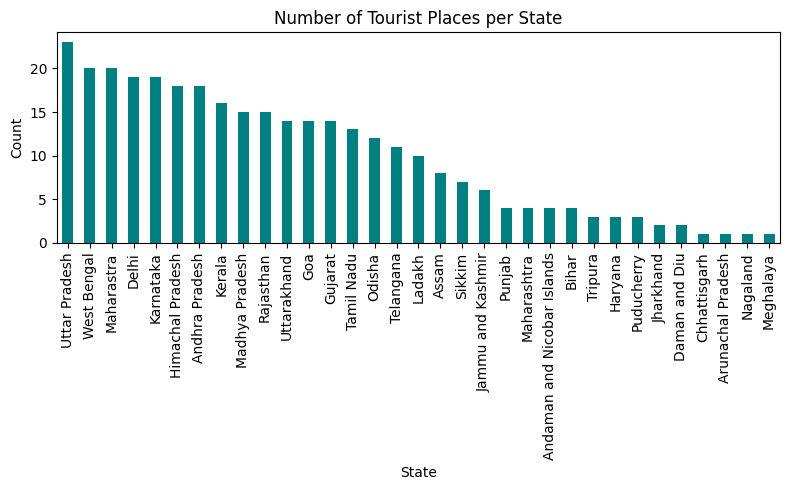

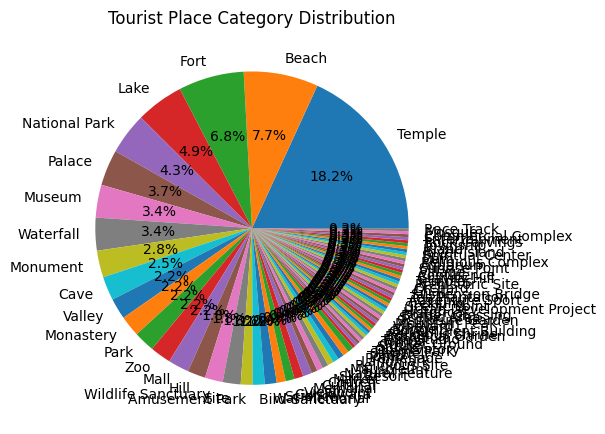

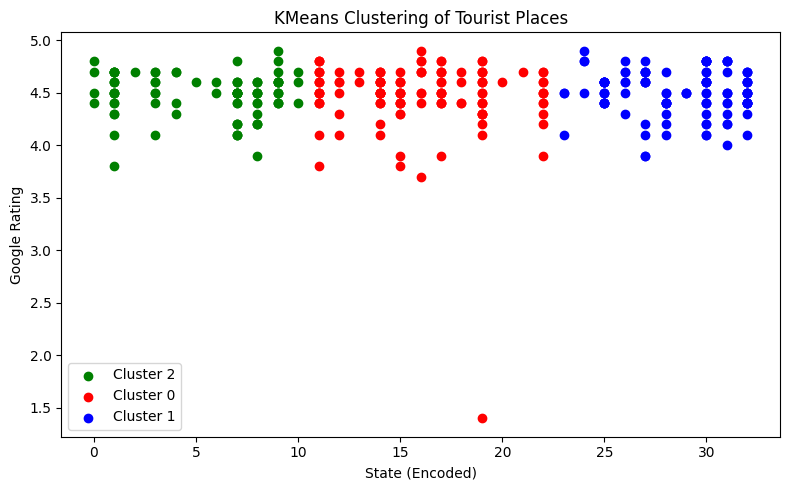


Total revenue for June: ₹148000
Revenue Equation: y = 500x - 2000, where x = number of sales


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("/content/Top Indian Places to Visit.csv")

# Convert review-related fields to numeric
df['Number of google review in lakhs'] = pd.to_numeric(df['Number of google review in lakhs'], errors='coerce')
df['Google review rating'] = pd.to_numeric(df['Google review rating'], errors='coerce')

# Drop any rows with missing values in key fields
df = df.dropna(subset=['Number of google review in lakhs', 'Google review rating'])


# Encode categorical fields
label_enc = LabelEncoder()
df['State_Encoded'] = label_enc.fit_transform(df['State'])
df['Zone_Encoded'] = label_enc.fit_transform(df['Zone'])

# DSLR: Convert Yes/No to binary
df['DSLR_Allowed_Flag'] = df['DSLR Allowed'].apply(lambda x: 1 if x == 'Yes' else 0)

# Rename review rating to consistent field
df['Google_Rating'] = df['Google review rating']


features = df[['State_Encoded', 'Google_Rating']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)



# a. Bar chart - State vs Number of Places
plt.figure(figsize=(8,5))
df['State'].value_counts().plot(kind='bar', color='teal')
plt.title("Number of Tourist Places per State")
plt.xlabel("State")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# b. Pie chart - Category Distribution
plt.figure(figsize=(6,6))
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Tourist Place Category Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

# c. Scatter plot - Clustering Results
plt.figure(figsize=(8,5))
colors = ['red', 'blue', 'green']
for c in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == c]
    plt.scatter(cluster_data['State_Encoded'], cluster_data['Google_Rating'],
                label=f'Cluster {c}', color=colors[c])
plt.xlabel("State (Encoded)")
plt.ylabel("Google Rating")
plt.title("KMeans Clustering of Tourist Places")
plt.legend()
plt.tight_layout()
plt.show()




def calculate_revenue(unit_price, monthly_cost, units_sold):
    revenue = unit_price * units_sold - monthly_cost
    return revenue

# Example:
unit_price = 500          # Cost per tourist service
monthly_cost = 2000       # Fixed monthly running cost
june_sales = 300          # Units sold in June

june_revenue = calculate_revenue(unit_price, monthly_cost, june_sales)
print(f"\nTotal revenue for June: ₹{june_revenue}")

# General formula function: y = 500x - 2000
def revenue_equation(x):
    return 500 * x - 2000

print("Revenue Equation: y = 500x - 2000, where x = number of sales")